**MUHAMMMD MURSALEEN MUSTAFVI 23F-0659**

In [634]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [635]:
df = pd.read_csv('pakistan-media-dataset-synthetic.csv')

CHECK DATA DETAIL


In [636]:
print('NO OF NULL VALUES\n',df.isna().sum())
print('TOTAL DUPLICATED COLUMNS',df.duplicated().sum())
print('SHAPE OF DATASET',df.shape)


NO OF NULL VALUES
 ID                            0
Journalist                    0
Channel                       0
Newspaper                     0
Region                        0
City                          0
Topic                         0
Headline                      0
Ratings                    7360
Revenue                    3081
Airtime                    7511
SentimentScore             7510
BiasScore                  7555
Viewership                 5004
Shares                     7496
AdSpend                    3705
ControversyFlag            2933
MissingDataFlag            4978
Date                          0
Language                   2993
PoliticalAffiliation       3743
SocialMediaInteractions    7560
dtype: int64
TOTAL DUPLICATED COLUMNS 0
SHAPE OF DATASET (15000, 22)


CLEANING PROCESS

Catagorial column


In [637]:
df = df.drop_duplicates()

channel_corrections = {
    'arynews': 'ARY News',
    'ary news': 'ARY News',
    'arynews ': 'ARY News',
    'ary': 'ARY News',
    'ary tv': 'ARY News',
    'express news': 'Express News',
    'expressnews': 'Express News',
    'express-news': 'Express News',
    'express': 'Express News',
    'express tv': 'Express News',
    'express news ': 'Express News',
    'geo': 'Geo News',
    'geo news': 'Geo News',
    'geo ': 'Geo News',
    'samaa tv': 'Samaa',
    'samaa': 'Samaa',
    'dawn': 'Dawn News',
    'dawn news': 'Dawn News',
    'dawnnews': 'Dawn News',
    'dawn-news': 'Dawn News',
    'dawn tv': 'Dawn News',
    'dawn news ': 'Dawn News'
}

mapping = {
    'Rauf Klassra': 'Rauf Klasra',
    'K. Khan': 'Kamran Khan',
    'Mohsin Raza': 'Mohsin Raza Khan'
}
df = df.replace(mapping)
mapping = {
    'Kpk': 'KPK',
    'Ajk': 'AJK'
}

df['Region'] = df['Region'].replace(mapping)
city_to_region = {
    'Islamabad': 'Islamabad',
    'Karachi': 'Sindh',
    'Hyderabad': 'Sindh',
    'Quetta': 'Balochistan',
    'Peshawar': 'KPK',
    'Lahore': 'Punjab',
    'Multan': 'Punjab',
    'Rawalpindi': 'Punjab'
}
df['ControversyFlag'] = df['ControversyFlag'].astype(str).str.lower().str.strip()

df['ControversyFlag'] = df['ControversyFlag'].replace({
    'yes': 1, 'y': 1, '1': 1, 'true': 1,
    'no': 0,  'n': 0, '0': 0, 'false': 0
})
def validate_region(x):
    city = x['City']
    return city_to_region.get(city, x['Region'])

df['Region'] = df.apply(validate_region, axis=1)


df['Channel'] = df['Channel'].replace(channel_corrections)

df['ControversyFlag'] = pd.to_numeric(df['ControversyFlag'], errors='coerce')
df['Language'] = df['Language'].replace({
    'eng': 'english', 'urdu ': 'urdu', 'en': 'english', 'english ': 'english'
})
cat_col = df.select_dtypes(exclude='number').columns

for col in cat_col:
    df[col] = df[col].astype(str).str.lower().str.strip()
df['PoliticalAffiliation'] = df['PoliticalAffiliation'].replace(['', ' ', 'nan', 'NaN', 'None', None], np.nan)
df['SentimentScore'] = pd.to_numeric(df['SentimentScore'], errors='coerce')
df['SentimentScore'] = df['SentimentScore'].clip(-1, 1)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'] = df['Date'].fillna(df['Date'].min())
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

Numerical columns

In [638]:


high_missing_threshold = 0.5  #50%

missing_pct_cat = df[cat_col].isna().mean()

for col in cat_col:
    df[col] = df[col].astype(str).str.capitalize().str.strip()
    if missing_pct_cat[col] < high_missing_threshold:
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].replace({'nan': np.nan})

def money_pkr(x):
    if pd.isnull(x):
        return np.nan
    mul = 1
    x = str(x).lower().strip()
    x=str(x).lower().replace(',','').strip()
    if 'crore' in x:
        mul = 10000000
    elif 'lakh' in x:
        mul = 100000
    elif 'k' in x:
        mul = 1000
    elif 'thousands' in x:
        mul = 1000
    elif 'million' in x:
        mul = 1000000

    x = ''.join(c for c in x if (c == '.' or c.isdigit()))
    if x == '':
        return np.nan
    else:
        x = float(x)

    return x * mul

df['Revenue'] = df['Revenue'].apply(money_pkr)
df['AdSpend'] = df['AdSpend'].apply(money_pkr)
df['Airtime'] = df['Airtime'].apply(lambda x: np.nan if x < 0 else x)
df['AdSpend'] = pd.to_numeric(df['AdSpend'], errors='coerce')
df['AdSpend'] =df['AdSpend'].apply(lambda x: np.nan if x<0 else x)
num_col = df.select_dtypes(include='number').columns
missing_pct_num = df[num_col].isna().mean()
for col in num_col:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    if missing_pct_num[col] < high_missing_threshold:
        df[col] = df[col].fillna(df[col].median())
    else:
        pass


Normalize , ENCODING , TRANSFORMATION

In [639]:

#normalize bias score to -1 to 1 score with min max range(-1,1)
df['BiasScore']=2*((df['BiasScore'] - df['BiasScore'].min())/(df['BiasScore'].max() -df['BiasScore'].min()) )-1

for i in num_col:
  if (i!='BiasScore_Norm'and i!='ID'):
    obj = StandardScaler()
    df[i +'_Norm']=obj.fit_transform(df[[i]])






#encoding categoriacl column
for i in cat_col:
   obj = LabelEncoder()
   df[i+'_Encoded']=obj.fit_transform(df[i])
  #transform
df['Revenue_transform'] = np.log1p(df['Revenue'])
df['BiasScore_transform']=np.log1p(df['BiasScore'])
df['AdSpend_transform']=np.log1p(df['AdSpend'])
df['Airtime_transform']=np.log1p(df['Airtime'])


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


SAVE CLEAN DATA AND DISPLAY

In [640]:
print(df.describe())
df.to_csv('clean_Paistan-media-dataset-aysthetic.csv')

                 ID       Ratings       Revenue      Airtime  SentimentScore  \
count  15000.000000  15000.000000  1.500000e+04  7056.000000     7490.000000   
mean    7499.500000     57.311435  8.306386e+06   248.924320        0.013009   
std     4330.271354     25.698631  7.064143e+06   144.060805        0.811222   
min        0.000000     -4.953392  2.065000e+03     0.000000       -1.000000   
25%     3749.750000     55.931258  5.000000e+06   125.000000       -0.952412   
50%     7499.500000     57.071673  5.000000e+06   249.000000        0.008126   
75%    11249.250000     58.432674  1.553884e+07   371.000000        1.000000   
max    14999.000000    119.986083  2.000000e+07   500.000000        1.000000   

         BiasScore    Viewership         Shares       AdSpend  \
count  7445.000000  1.500000e+04   15000.000000  1.500000e+04   
mean     -0.000761  3.398049e+05  100325.299933  5.604899e+06   
std       0.669225  5.836532e+05   40674.598462  2.824751e+06   
min      -1.000000 

Visualization

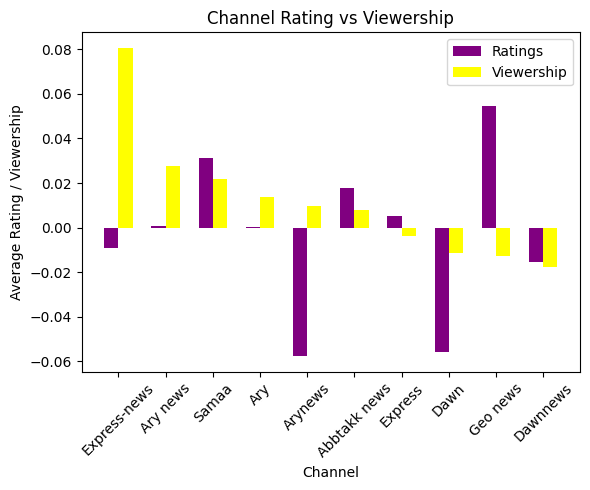

In [641]:


df_ch_rate = df.groupby('Channel')[['Ratings_Norm', 'Viewership_Norm']].mean().sort_values(by='Viewership_Norm', ascending=False).head(10)

plt.figure(figsize=(6,5))
plt.title("Channel Rating vs Viewership")
plt.ylabel("Average Rating / Viewership")
plt.xlabel("Channel")

wid = 0.3
bar1 = np.arange(len(df_ch_rate))
bar2 = bar1 + wid

plt.bar(bar1, df_ch_rate['Ratings_Norm'].values, color='Purple', width=wid, label='Ratings')
plt.bar(bar2, df_ch_rate['Viewership_Norm'].values, color='Yellow', width=wid, label='Viewership')

plt.xticks(bar1 + wid/2, df_ch_rate.index, rotation=45)

plt.legend()
plt.tight_layout()
plt.show()



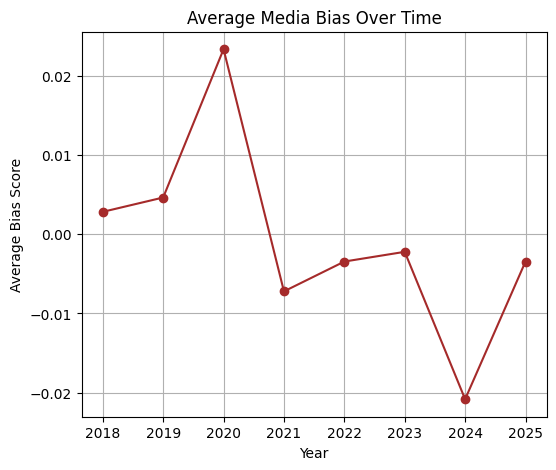

In [642]:

bias_trend = df.groupby('Year')['BiasScore'].mean()
plt.figure(figsize=(6,5))
plt.plot(bias_trend.index, bias_trend.values, marker='o',color='brown')
plt.title('Average Media Bias Over Time')
plt.xlabel('Year')
plt.ylabel('Average Bias Score')
plt.grid(True)
plt.show()

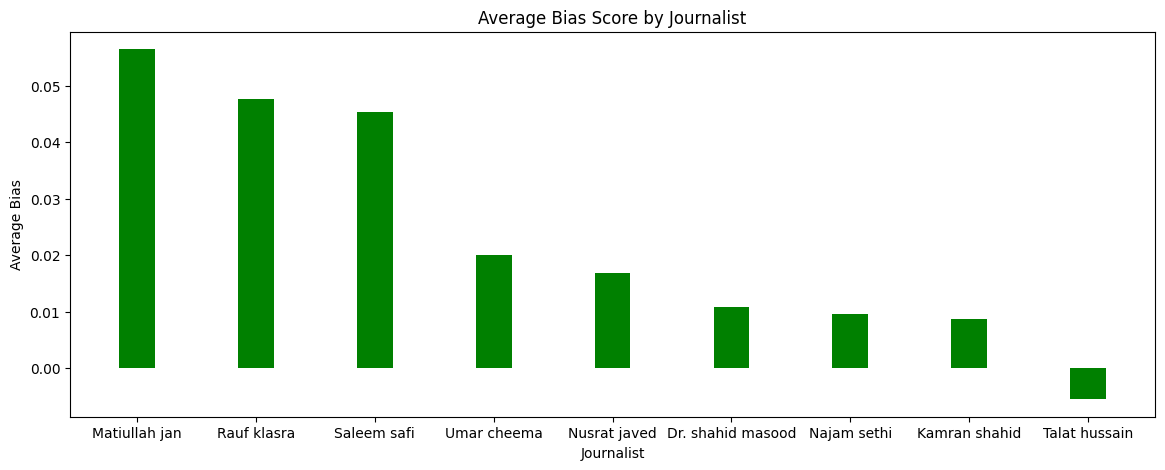

In [643]:
#top biaed journalist
df_sort=df.sort_values(by='BiasScore',ascending=False)
biase_journalist= df_sort.groupby('Journalist')['BiasScore'].mean().sort_values(ascending=False).head(9)
plt.figure(figsize=(14,5))
plt.title("Average Bias Score by Journalist")
plt.ylabel("Average Bias")
plt.xlabel("Journalist")
plt.bar(biase_journalist.index,biase_journalist,color='Green',width=0.3)
plt.show()

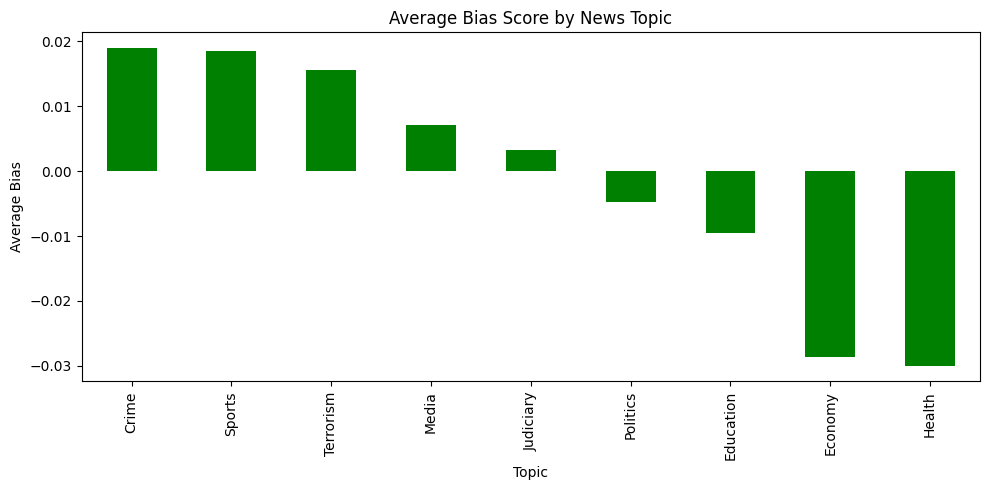

In [644]:
plt.figure(figsize=(10,5))
topic_bias = df.groupby('Topic')['BiasScore'].mean().sort_values(ascending=False)
topic_bias.plot(kind='bar', color='green')
plt.title("Average Bias Score by News Topic")
plt.ylabel("Average Bias")
plt.xlabel("Topic")
plt.tight_layout()
plt.show()



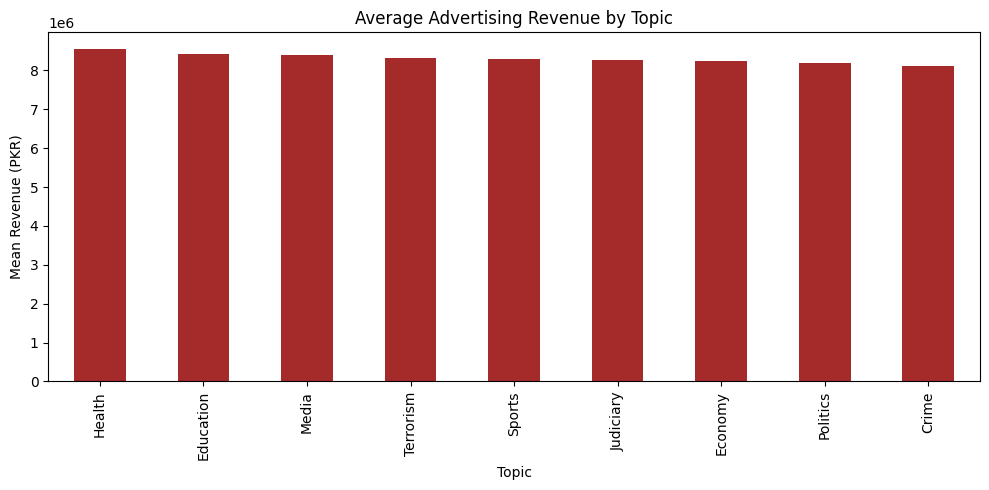

In [645]:
plt.figure(figsize=(10,5))
topic_rev = df.groupby('Topic')['Revenue'].mean().sort_values(ascending=False)
topic_rev.plot(kind='bar', color='brown')
plt.title("Average Advertising Revenue by Topic")
plt.ylabel("Mean Revenue (PKR)")
plt.xlabel("Topic")
plt.tight_layout()
plt.show()

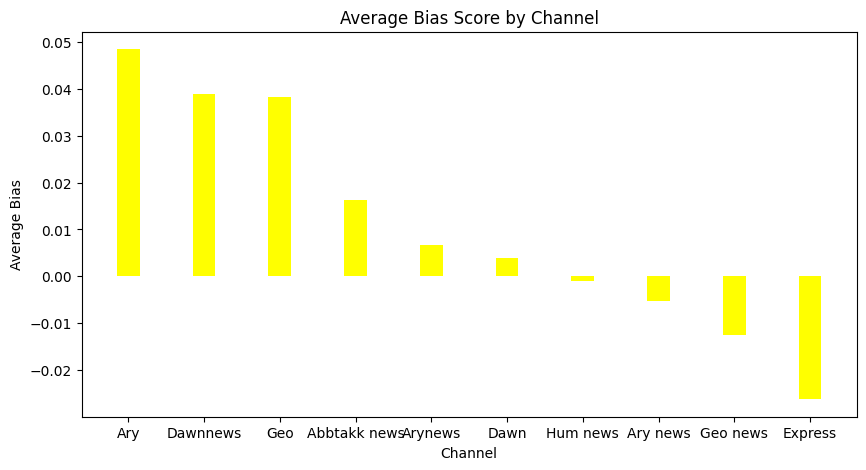

In [646]:
#top biaed channel
df_sort=df.sort_values(by='Channel',ascending=False)
biase_Channel= df_sort.groupby('Channel')['BiasScore'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
plt.title("Average Bias Score by Channel")
plt.ylabel("Average Bias")
plt.xlabel("Channel")
plt.bar(biase_Channel.index,biase_Channel,color='Yellow',width=0.3)
plt.show()

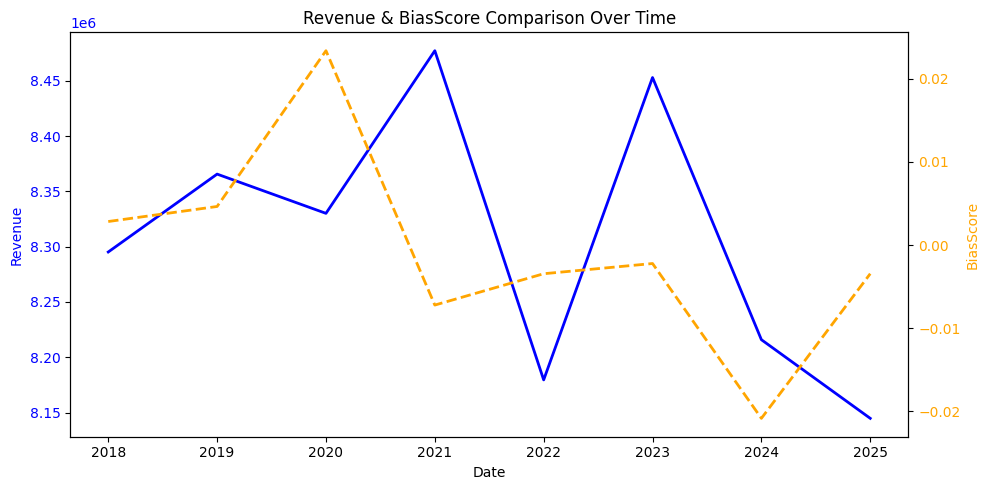

In [647]:



df_plot = df.groupby('Year')[['Revenue', 'BiasScore']].mean().head(10)

fig, ax1 = plt.subplots(figsize=(10,5))

# Plot Revenue
ax1.plot(df_plot.index, df_plot['Revenue'], color='blue', label='Revenue', linewidth=2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot BiasScore
ax2 = ax1.twinx()
ax2.plot(df_plot.index, df_plot['BiasScore'], color='orange', label='BiasScore', linewidth=2, linestyle='--')
ax2.set_ylabel('BiasScore', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
plt.xticks(rotation=45)
plt.title('Revenue & BiasScore Comparison Over Time')
fig.tight_layout()
plt.show()


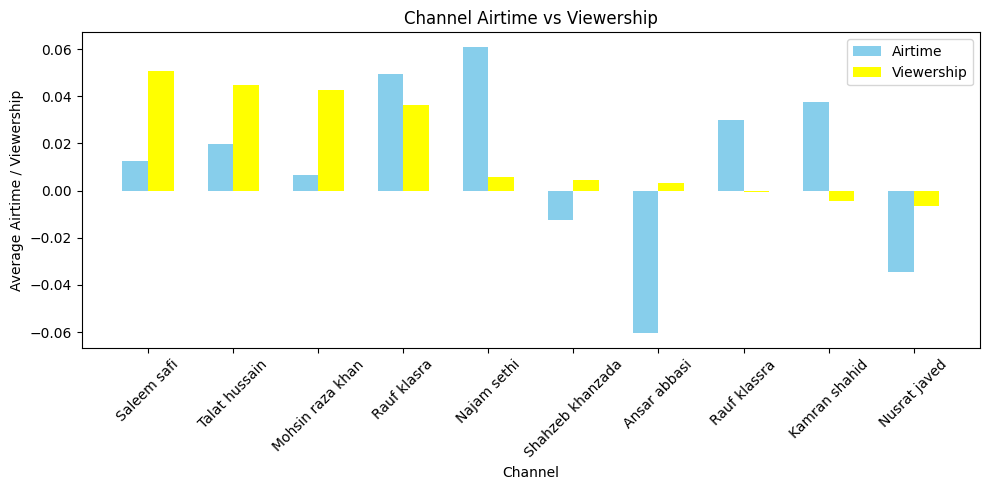

In [648]:


df_ch_rate = df.groupby('Journalist')[['Airtime_Norm', 'Viewership_Norm']].mean().sort_values(by='Viewership_Norm', ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.title("Channel Airtime vs Viewership")
plt.ylabel("Average Airtime / Viewership")
plt.xlabel("Channel")

wid = 0.3
bar1 = np.arange(len(df_ch_rate))
bar2 = bar1 + wid

plt.bar(bar1, df_ch_rate['Airtime_Norm'].values, color='Skyblue', width=wid, label='Airtime')
plt.bar(bar2, df_ch_rate['Viewership_Norm'].values, color='Yellow', width=wid, label='Viewership')

plt.xticks(bar1 + wid/2, df_ch_rate.index, rotation=45)

plt.legend()
plt.tight_layout()
plt.show()



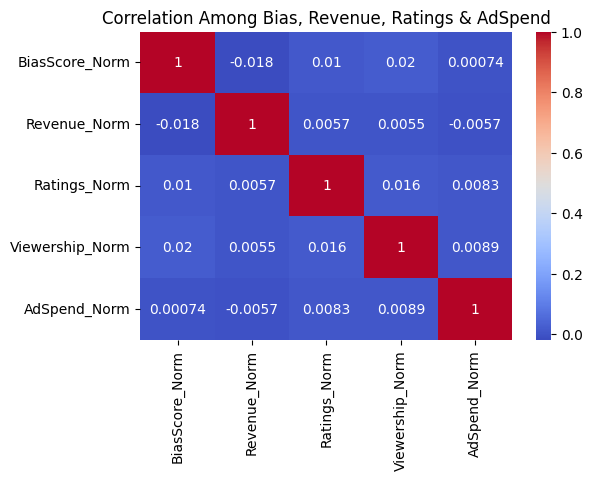

In [649]:
corr = df[['BiasScore_Norm', 'Revenue_Norm', 'Ratings_Norm', 'Viewership_Norm', 'AdSpend_Norm']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Among Bias, Revenue, Ratings & AdSpend')
plt.show()

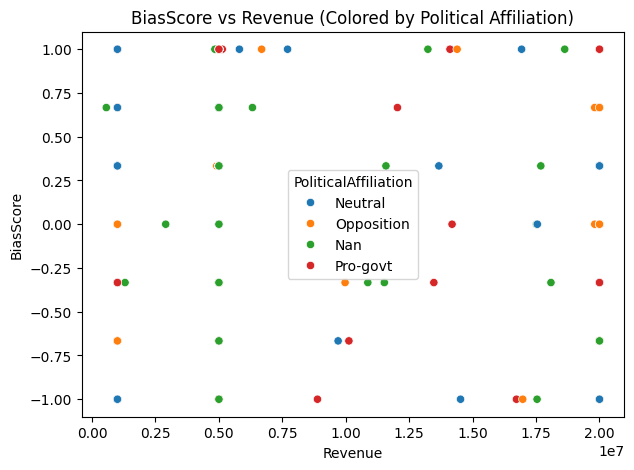

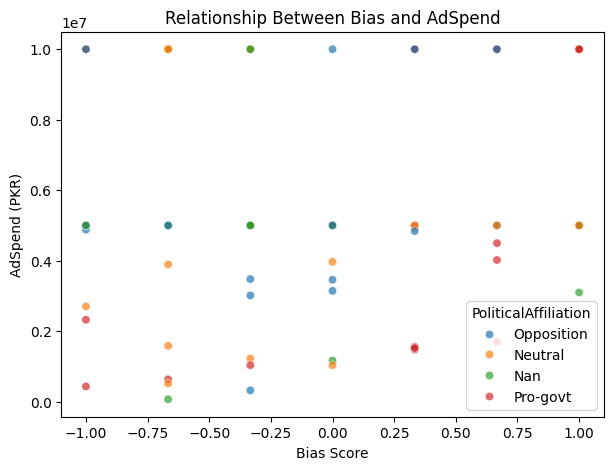

In [650]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Revenue', y='BiasScore', hue='PoliticalAffiliation', data=df.sample(500))
plt.title('BiasScore vs Revenue (Colored by Political Affiliation)')
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x='BiasScore', y='AdSpend', data=df.sample(250), hue='PoliticalAffiliation', alpha=0.7)
plt.title("Relationship Between Bias and AdSpend")
plt.xlabel("Bias Score")
plt.ylabel("AdSpend (PKR)")
plt.show()



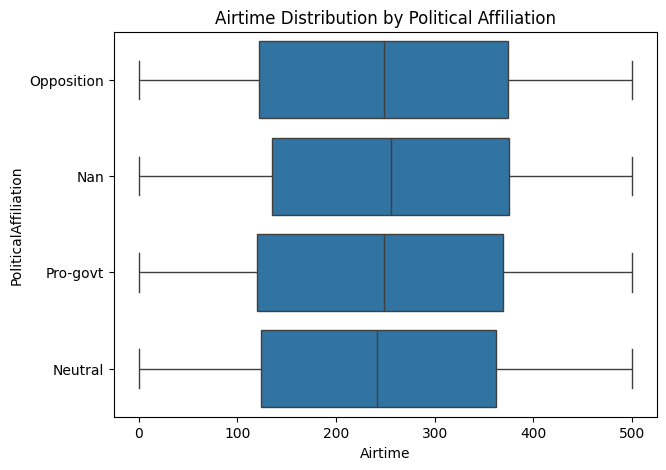

In [651]:
plt.figure(figsize=(7,5))
sns.boxplot(y='PoliticalAffiliation', x='Airtime', data=df)
plt.title('Airtime Distribution by Political Affiliation')
plt.show()

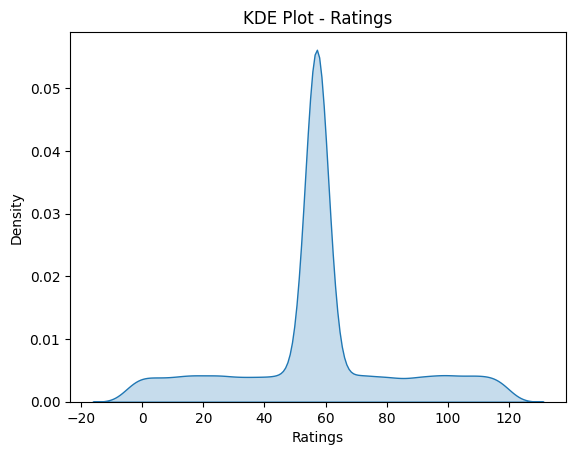

In [652]:
sns.kdeplot(df['Ratings'], fill=True)
plt.title("KDE Plot - Ratings")
plt.show()


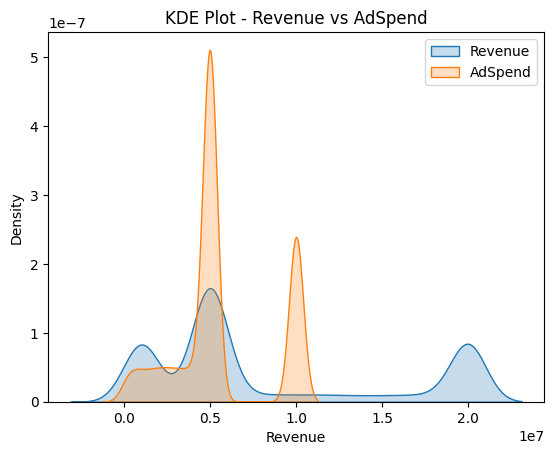

In [653]:
sns.kdeplot(df['Revenue'], fill=True, label='Revenue')
sns.kdeplot(df['AdSpend'], fill=True, label='AdSpend')
plt.title("KDE Plot - Revenue vs AdSpend")
plt.legend()
plt.show()


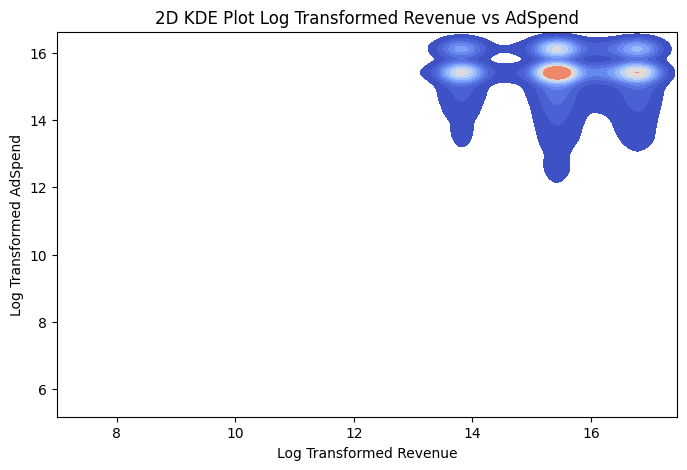

In [654]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x='Revenue_transform',y='AdSpend_transform',fill=True,cmap='coolwarm',thresh=0.05,levels=10)

plt.title('2D KDE Plot Log Transformed Revenue vs AdSpend')
plt.xlabel('Log Transformed Revenue')
plt.ylabel('Log Transformed AdSpend')
plt.show()

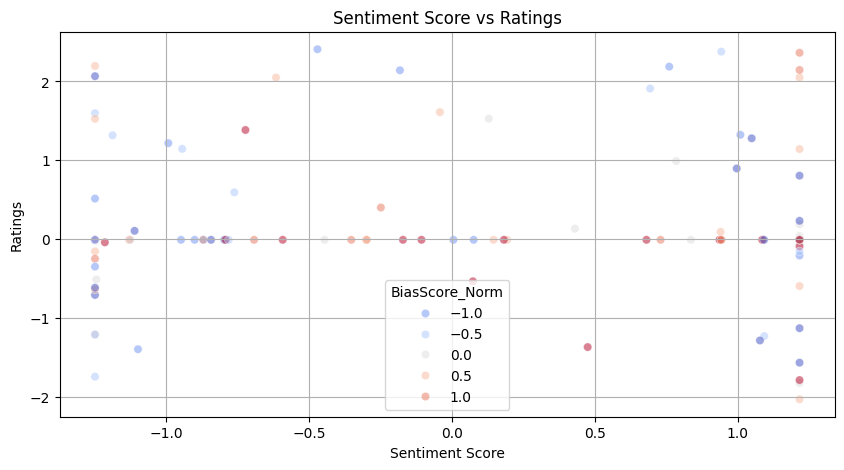

In [655]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='SentimentScore_Norm',y= 'Ratings_Norm',data=df.sample(500),hue='BiasScore_Norm' ,alpha=0.5,palette='coolwarm')
plt.title('Sentiment Score vs Ratings')
plt.xlabel('Sentiment Score')
plt.ylabel('Ratings')
plt.grid(True)
plt.show()